In [131]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})

In [132]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    """
    # дописать документация
    Выводить R2 и строит графики для оценки качества модели
    """
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

    plt.figure(figsize=(18,10))
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [133]:
TRAIN_DATASET_PATH = 'C:/Users/user/Documents/GeekBrains/Python_NUMPY/Final_Project/train.csv' # y_train, y_valid
TEST_DATASET_PATH = 'C:/Users/user/Documents/GeekBrains/Python_NUMPY/Final_Project/test.csv'

In [134]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

In [135]:
train_df.loc[train_df["HouseYear"] == 4968, 'HouseYear'] = 1968
train_df.loc[train_df["HouseYear"] == 20052011, 'HouseYear'] = 2005

In [136]:
test_df.shape[0]

5000

In [137]:
test_df.loc[test_df["HouseYear"] == 4968, 'HouseYear'] = 1968
test_df.loc[test_df["HouseYear"] == 20052011, 'HouseYear'] = 2005

In [138]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

In [139]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_3'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

In [140]:
test_df.shape[0]

5000

In [141]:
train_df['Rooms'] = train_df['Rooms'].replace({0:1, 10:6, 19:6})
test_df['Rooms'] = test_df['Rooms'].replace({0:1, 10:6, 19:6})

In [142]:
test_df.shape[0]

5000

In [143]:
train_df.loc[train_df['LifeSquare'] < 10, 'LifeSquare'] = 10
train_df.loc[train_df['KitchenSquare'] < 6, 'KitchenSquare'] = 6

In [144]:
test_df.loc[test_df['LifeSquare'] < 10, 'LifeSquare'] = 10
test_df.loc[test_df['KitchenSquare'] < 6, 'KitchenSquare'] = 6

In [145]:
test_df.shape[0]

5000

In [146]:
train_df.loc[train_df['Square'] < train_df["KitchenSquare"] + train_df["LifeSquare"], 'Square'] = train_df["KitchenSquare"] + train_df["LifeSquare"]

In [147]:
test_df.loc[test_df['Square'] < test_df["KitchenSquare"] + test_df["LifeSquare"], 'Square'] = test_df["KitchenSquare"] + test_df["LifeSquare"]

In [148]:
train_df.loc[train_df['HouseFloor'] > 40, 'HouseFloor'] = train_df['HouseFloor'].median()
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [149]:
test_df.loc[test_df['HouseFloor'] > 40, 'HouseFloor'] = test_df['HouseFloor'].median()
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()

In [150]:
test_df.shape[0]

5000

In [151]:
train_df.loc[train_df['Floor'] > 40, 'Floor'] = train_df['Floor'].median()
test_df.loc[test_df['Floor'] > 40, 'Floor'] = test_df['Floor'].median()

In [152]:
train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].median()
train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df["Square"] - train_df["KitchenSquare"]

In [153]:
test_df.loc[test_df['Healthcare_1'].isnull(), 'Healthcare_1'] = test_df['Healthcare_1'].median()
test_df.loc[test_df['LifeSquare'].isnull(), 'LifeSquare'] = test_df["Square"] - test_df["KitchenSquare"]

In [154]:
feature_names = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

target_name = 'Price'

In [155]:
X = train_df[feature_names]
y = train_df[target_name]

In [156]:
test_df.shape[0]

5000

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=21
)

In [158]:
rf_model = RandomForestRegressor(max_depth=8, min_samples_split=100, n_estimators=500, n_jobs=-1, random_state=39)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_split=100, n_estimators=500,
                      n_jobs=-1, random_state=39)

In [159]:
test_df.shape[0]

5000

Train R2:	0.715
Test R2:	0.683


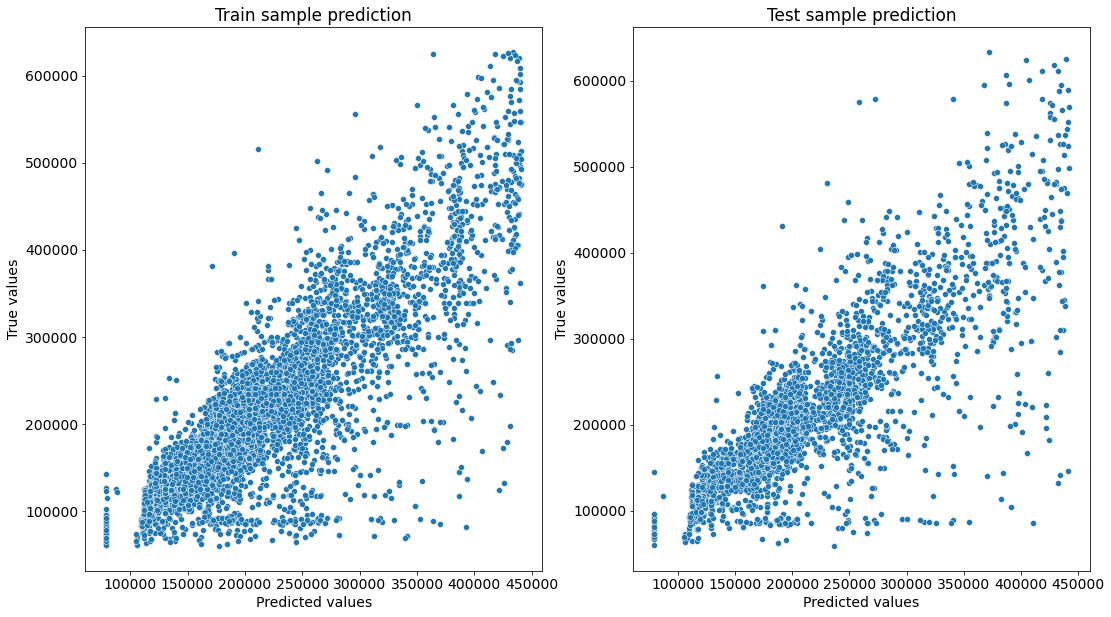

In [160]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)


In [161]:
cv_score = cross_val_score(
    rf_model,
    X.fillna(-9999),
    y, scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score

array([0.70013652, 0.66379452, 0.65662891, 0.67061113, 0.69056561])

In [162]:
cv_score.mean(), cv_score.std()

(0.6763473359662567, 0.016415711663560446)

In [163]:
test_df.shape[0]

5000

In [164]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
3,Square,0.386768
2,Rooms,0.204296
13,Social_2,0.121425
12,Social_1,0.104070
14,Social_3,0.054233
1,DistrictId,0.035373
9,Ecology_1,0.026823
15,Healthcare_1,0.015405
5,KitchenSquare,0.012657
4,LifeSquare,0.011535


In [165]:
test_df.shape[0]

5000

In [166]:
test_id = test_df["Id"]
pred_df = pd.DataFrame()
pred_df["Id"] = test_id
pred_df["Price"] = np.random.randint(0, 1e6, size=test_id.shape[0])
assert pred_df.shape[0] == 5000, f"Real pred-shape = {pred_df.shape[0]}, Expected pred-shape = 5000"

pred_df.to_csv("C:/Users/user/Documents/GeekBrains/Python_NUMPY/Final_Project/predictions_.csv", index=False)